# Exercise 1
## 1.) Taylorentwicklung

Taylorentwicklung: $ Tf(x) = \sum_{i=0}^n \frac{f^{(i)}(x_0)}{i!} (x-x_0)^i $
$$ f(x) = \frac{1}{x-1} $$
Betrachten wir die Ableitungen von f(x): $ f'(x) = -1(x-1)^{-2} \quad f''(x)= 2(x-1)^{-3}$

Es lässt sich folgendes Muster erkennen: $ f^{i}(x) = (-1)^i \cdot i! \cdot (x-1)^{i+1} $

Sei $x_0 = 0$, dann gilt 
$$Tf(x) = \sum_{i=0}^n \frac{(-1)^i \cdot i! \cdot (-1)^{i+1}}{i!} x^i = \sum_{i=0}^n \frac{(-1)^{2i+1} \cdot i!}{i!} x^i = \sum_{i=0}^n -x^i$$

$$ g(x) = \frac{1}{x^2+1}$$
Ableitungen von g(x):
$$ g'(x) = -2x(x^2+1)^{-2} $$
$$ g''(x) = 8x^2(x^2+1)^{-3}-2(x^2+1)^{-2} $$
$$ g^{(3)}(x) = -48x^3(x^2+1)^{-4} + 24x(x^2+1)^{-3}$$
$$ g^{(4)}(x) = +196x^4(x^2+1)^{-5} - 288x^2(x^2+1)^{-4} - 24(x^2+1)^{-3}$$

Bei Entwicklungspunkt $x_0 = 0$ bleibt nur bei geraden Ableitungen ein Term übrig.
$$ Tg(x) = \sum_{i=0,j = 2i}^n \frac{(-1)^{\frac{j}{2}}j!}{j!}x^j = \sum_{i=0, j = 2i}^n (-1)^{\frac{j}{2}}x^j$$ 

<function matplotlib.pyplot.show(*args, **kw)>

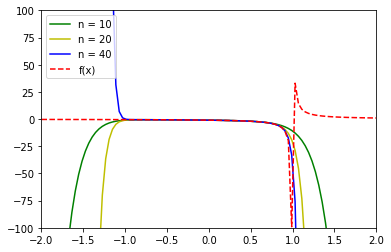

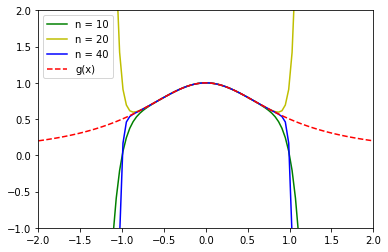

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly

k = 40
# Initialize polynomials
cf = np.ones(k)
cg = np.zeros(k)

cf = cf * -1
for i in range(0,int(k/2)):
    cg[2*i] = (-1)**i
    
n = 100
x = np.linspace(-2,2,n)
Tf3 = poly.Polynomial(cf,[-2,2],[-2,2])
Tf2 = Tf3.cutdeg(deg=20)
Tf1 = Tf3.cutdeg(deg=10)
Tg3 = poly.Polynomial(cg,[-2,2],[-2,2])
Tg2 = Tg3.cutdeg(deg=20)
Tg1 = Tg3.cutdeg(deg=10)

# evaluate polynomials
f_a3 = Tf3.linspace(n)
f_a2 = Tf2.linspace(n)
f_a1 = Tf1.linspace(n)
g_a3 = Tg3.linspace(n)
g_a2 = Tg2.linspace(n)
g_a1 = Tg1.linspace(n)


plt.figure(1)
f = lambda x: 1/(x-1)
g = lambda x: 1/(x**2+1)
plt.plot(x, f_a1[1], 'g', label="n = 10")
plt.plot(x, f_a2[1], 'y', label="n = 20")
plt.plot(x, f_a3[1], 'b', label="n = 40")
plt.plot(x, f(x), 'r--', label="f(x)")
plt.legend(loc="upper left")
plt.axis([-2,2,-100,100])
plt.show
plt.figure(2)
plt.plot(x, g_a1[1], 'g', label="n = 10")
plt.plot(x, g_a2[1], 'y', label="n = 20")
plt.plot(x, g_a3[1], 'b', label="n = 40")
plt.plot(x, g(x), 'r--', label="g(x)")
plt.legend(loc="upper left")
plt.axis([-2,2,-1,2])
plt.show

## 2.) Interpolation polynomials
$$ f(x) = \frac {1}{x^2+1} $$
On the interval $[-5,5]$ for $ k = {10,20,40} $ knots. Distributed uniformly and according to Chebyshev distribution: $x_i = 5cos \frac {(i+0.5)\pi}{k+1}$

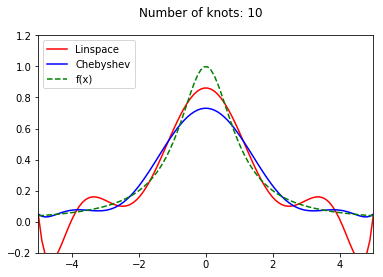

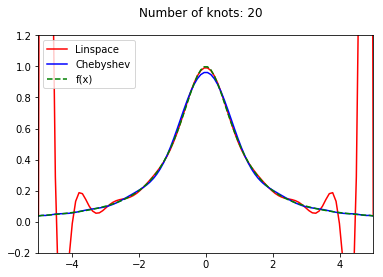

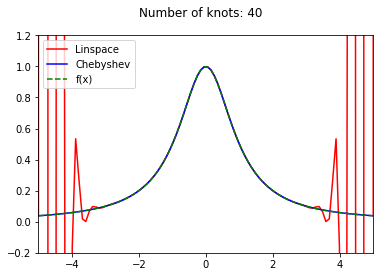

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import time

def ChebPoints(n):
    # n is number of points, highest point therefore is n-1
    x = np.zeros(n)
    
    for i in range(0, n):
        x[i] = np.cos(np.pi*(i + 0.5)/(n))
        
    return x

k = np.array([10,20,40])
knots_u = []
knots_c = []

for i in range(0, k.size):
    knots_u.append(np.linspace(-5,5,k[i]))
    knots_c.append(5*ChebPoints(k[i]))
    
def Lagrange(x,knots,i):
    l_i = 1
    for j in range(len(knots)):
        if j != i:
            l_i = l_i * (x-knots[j])/(knots[i]-knots[j])
    return l_i

def InterPol(x, knots, function):
    sum = 0
    for i in range(len(knots)):
        sum = sum + function(knots[i]) * Lagrange(x, knots, i)
    return sum

x = np.linspace(-5,5,100)
f = lambda x: 1/(x**2+1)

for i in range(len(k)):
    plt.figure(i)
    plt.suptitle('{} {}'.format('Number of knots:', k[i]))
    plt.plot(x, InterPol(x, knots_u[i], f), 'r', label = "Linspace")
    plt.plot(x, InterPol(x, knots_c[i], f), 'b',label="Chebyshev")
    plt.plot(x, f(x), 'g--',label="f(x)")
    plt.axis([-5,5,-0.2,1.2])
    plt.legend(loc="upper left")
    plt.show
    

The Lebesgue constant is bounded by $$ h(x)=\frac {2*ln(x+1)}{\pi}+1 $$

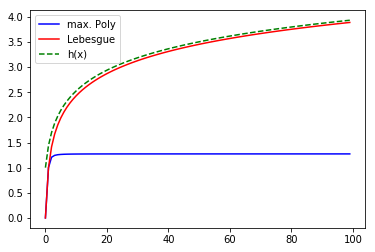

In [140]:
n_max = 100

l_imax = np.zeros(n_max)
leb = np.zeros(n_max)

for i in range(1,n_max):
    p_c = 5*ChebPoints(i)
    lebi = 0
    for j in range(i):
        l_i = Lagrange(x,p_c,j)
        labs = np.max(np.abs(l_i))
        if labs > l_imax[i]:
            l_imax[i] = labs
        lebi = lebi + np.abs(Lagrange(x,p_c,j))
        
    leb[i] = np.max(lebi)

n = range(n_max)
h = lambda n: 2*(np.log(n+np.ones_like(n)))/np.pi+np.ones_like(n)

plt.figure()

plt.plot(n, leb, 'r', label="Lebesgue")
plt.plot(n, l_imax, 'b', label="max. Poly")
plt.plot(n, h(n), 'g--',label="h(x)")
plt.legend(loc="upper left")

    